In [39]:
import pandas as pd

### read train file into pandas using a relative path
path = "C:\\Users\Sushma\Documents\Major Project\RTrain.csv"
train_data = pd.read_csv(path, header=None, names= ['label','calls'])

In [40]:
train_data.shape

(388, 2)

In [41]:
train_data.head(5)

,label,calls
0,1,LoadLibraryW HeapAlloc HeapAlloc HeapFree Heap...
1,1,RegOpenKeyExW LoadLibraryA GetProcAddress GetP...
2,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
3,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
4,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...


In [42]:
# examine the class distribution
train_data.label.value_counts()

1    320
0     68
Name: label, dtype: int64

# Some Preprocessing of Data needs to be done

In [43]:
# Making everything lower case 
train_data['calls'] = train_data['calls'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [44]:
train_data.head()

,label,calls
0,1,loadlibraryw heapalloc heapalloc heapfree heap...
1,1,regopenkeyexw loadlibrarya getprocaddress getp...
2,1,heapalloc heapfree heapalloc heapalloc heapfre...
3,1,heapalloc heapfree heapalloc heapalloc heapfre...
4,1,heapalloc heapfree heapalloc heapalloc heapfre...


In [45]:
# Removing Punctuation

train_data['calls'] = train_data['calls'].str.replace('[^\w\s]','')
train_data['calls'].head()

0    loadlibraryw heapalloc heapalloc heapfree heap...
1    regopenkeyexw loadlibrarya getprocaddress getp...
2    heapalloc heapfree heapalloc heapalloc heapfre...
3    heapalloc heapfree heapalloc heapalloc heapfre...
4    heapalloc heapfree heapalloc heapalloc heapfre...
Name: calls, dtype: object

In [50]:
# Making a list of Rare words 

freq = pd.Series(' '.join(train_data['calls']).split()).value_counts()[-10:]

In [51]:
#Removing the rare words from our data
freq = list(freq.index)
train_data['calls'] = train_data['calls'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train_data['calls'].head()

0    loadlibraryw heapalloc heapalloc heapfree heap...
1    regopenkeyexw loadlibrarya getprocaddress getp...
2    heapalloc heapfree heapalloc heapalloc heapfre...
3    heapalloc heapfree heapalloc heapalloc heapfre...
4    heapalloc heapfree heapalloc heapalloc heapfre...
Name: calls, dtype: object

In [52]:
X_train = train_data.calls
y_train = train_data.label

# Importing Test set 

In [55]:
### read test file into pandas using a relative path
path = "C:\\Users\Sushma\Documents\Major Project\RTest.csv"
test_data = pd.read_csv(path, header=None, names= ['label','calls'])

In [56]:
test_data.shape

(378, 2)

In [58]:
test_data.head(5)

,label,calls
0,0,LocalAlloc LocalAlloc LocalAlloc LocalAlloc He...
1,0,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
2,0,RegOpenKeyExW LoadLibraryA GetProcAddress GetP...
3,0,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
4,0,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...


In [59]:
# examine the class distribution
test_data.label.value_counts()

0    378
Name: label, dtype: int64

In [60]:
# Making everything lower case 
test_data['calls'] = test_data['calls'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [61]:
test_data.head()

,label,calls
0,0,localalloc localalloc localalloc localalloc he...
1,0,heapalloc heapfree heapalloc heapalloc heapfre...
2,0,regopenkeyexw loadlibrarya getprocaddress getp...
3,0,heapalloc heapfree heapalloc heapalloc heapfre...
4,0,heapalloc heapfree heapalloc heapalloc heapfre...


In [62]:
# Removing Punctuation

test_data['calls'] = test_data['calls'].str.replace('[^\w\s]','')
test_data['calls'].head()

0    localalloc localalloc localalloc localalloc he...
1    heapalloc heapfree heapalloc heapalloc heapfre...
2    regopenkeyexw loadlibrarya getprocaddress getp...
3    heapalloc heapfree heapalloc heapalloc heapfre...
4    heapalloc heapfree heapalloc heapalloc heapfre...
Name: calls, dtype: object

In [65]:
# Making a list of Rare words 

freq1 = pd.Series(' '.join(train_data['calls']).split()).value_counts()[-10:]

In [66]:
#Removing the rare words from our data
freq1 = list(freq1.index)
test_data['calls'] = test_data['calls'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
test_data['calls'].head()

0    localalloc localalloc localalloc localalloc he...
1    heapalloc heapfree heapalloc heapalloc heapfre...
2    regopenkeyexw loadlibrarya getprocaddress getp...
3    heapalloc heapfree heapalloc heapalloc heapfre...
4    heapalloc heapfree heapalloc heapalloc heapfre...
Name: calls, dtype: object

In [67]:
X_test = test_data.calls
y_test = test_data.label

### Part 1: TF-IDF Vectorizer for Feature Extraction

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word', min_df=5, max_features=1000)
train_vect = tfidf.fit_transform(X_train)

In [69]:
train_vect

<388x203 sparse matrix of type '<class 'numpy.float64'>'
	with 16287 stored elements in Compressed Sparse Row format>

In [70]:
test_vect = tfidf.transform(X_test)

In [71]:
test_vect

<378x203 sparse matrix of type '<class 'numpy.float64'>'
	with 15297 stored elements in Compressed Sparse Row format>

### Naive Bayes classifier


In [72]:
# Now we have processed the text to make it useful for running further classification or Regression algorithms

# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [73]:
# train the model using train_vect (timing it with an IPython "magic command")
%time nb.fit(train_vect, y_train)

Wall time: 2.99 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
# make class predictions for test_vect
y_pred_class = nb.predict(test_vect)

#### Accuracy score (Naive Bayes)

In [75]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.04497354497354497

#### Confusion Matrix (Naive Bayes)

In [76]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 17, 361],
       [  0,   0]], dtype=int64)

### Logistic Regression Classifer


In [77]:
# Comparing models
#We will compare multinomial Naive Bayes with logistic regression:

# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [78]:
# train the model using X_train_dtm
%time logreg.fit(train_vect, y_train)

Wall time: 1.06 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(test_vect)

#### Accuracy Score (Logistic Regression)


In [81]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.05555555555555555

#### Confusin Matrix (Logistic Regression)

In [82]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 21, 357],
       [  0,   0]], dtype=int64)

### Part 2: Hashing Vectorizer for Feature Extraction

In [83]:
from sklearn.feature_extraction.text import HashingVectorizer

# create the transform
vectorizer = HashingVectorizer()
# encode document
train_vector = vectorizer.fit_transform(X_train)
# summarize encoded vector
print(train_vector.shape)

(388, 1048576)


In [84]:
test_vector = vectorizer.transform(X_test)
print(test_vector.shape)

(378, 1048576)


### K - Nearest Neighbour Classifier

In [85]:
# Since Naive Bayes cannot be used for negative values, we will use knn and Logistic Regression

#Using K nearest neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

In [86]:
#We will see what value of k will give highest accuracy
k_range = range(1,26)
scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_vector,y_train)
    y_pred = knn.predict(test_vector)
    scores.append(metrics.accuracy_score(y_test,y_pred))

In [87]:
print(scores)

[0.21164021164021163, 0.2804232804232804, 0.1984126984126984, 0.24074074074074073, 0.1931216931216931, 0.23015873015873015, 0.18518518518518517, 0.2275132275132275, 0.18253968253968253, 0.20105820105820105, 0.16666666666666666, 0.2037037037037037, 0.17724867724867724, 0.20634920634920634, 0.17724867724867724, 0.1931216931216931, 0.17195767195767195, 0.19576719576719576, 0.1693121693121693, 0.18518518518518517, 0.17195767195767195, 0.1984126984126984, 0.1693121693121693, 0.17724867724867724, 0.15343915343915343]


#### Checking what value of k gives highest accuracy

Text(0,0.5,'Testing accuracy')

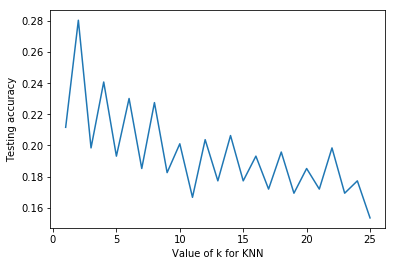

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(k_range, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing accuracy")

#### Accuracy Score (KNN)


In [91]:
# Let's choose k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_vector,y_train)
y_pred = knn.predict(test_vector)
metrics.accuracy_score(y_test,y_pred)

0.2804232804232804

#### Confusion Matrix (KNN)

In [92]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[106, 272],
       [  0,   0]], dtype=int64)

### Logistic Regression Classfier 

In [93]:
# import and instantiate a Linear Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [94]:
# train the model using train_vector
%time logreg.fit(train_vector, y_train)

Wall time: 283 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
y_pred_class = logreg.predict(test_vector)

#### Accuracy score (Logistic Regression)

In [96]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.015873015873015872

#### Confusion Matrix (Logistic regression)

In [97]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[  6, 372],
       [  0,   0]], dtype=int64)

### Part 3: Count Vectorizer for Feature Extraction


In [98]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000)

In [99]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)

In [100]:
# examine the document-term matrix
X_train_dtm

<388x287 sparse matrix of type '<class 'numpy.int64'>'
	with 16435 stored elements in Compressed Sparse Row format>

In [101]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<378x287 sparse matrix of type '<class 'numpy.int64'>'
	with 15383 stored elements in Compressed Sparse Row format>

### Naive Bayes Classifier

In [103]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [104]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 1.99 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [105]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

#### Accuracy Score (Naive Bayes)

In [106]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.3492063492063492

#### Confusion Matrix (Naive Bayes)

In [108]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[132, 246],
       [  0,   0]], dtype=int64)

### Logistic Regression Classifier 


In [109]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [110]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 39.9 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

#### Accuracy Score (Logistic Regression)


In [112]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.18253968253968253

#### Confusion Matrix (Logistic Regression)

In [114]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 69, 309],
       [  0,   0]], dtype=int64)